In [ ]:
import pandas as pd

import pandas as pd

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
data = pd.read_csv('/content/drive/MyDrive/news_tweets_cleaned_2.csv',encoding='latin1')
selected_columns = data[["Tweet_english"]]
#df_full=data['Tweet_english']
df = selected_columns.copy()
df.drop(df[df['Tweet_english'].str.startswith('RT')].index,inplace = True)
#df=data['Text']
#print (f'Document: {df.iloc[0]}')
#df=df_full.head(105)
print(df)
tweet_list=list(df['Tweet_english'])
print(len(tweet_list))
print("df_sample Created")


                                          Tweet_english
0     australia nears omicron peak as daily infectio...
1     indias covid vaccination coverage crosses  crore 
2      covid delhi records  cases  deaths testing low  
3     covid  west bengal registers  fresh cases amp ...
4     corona is a unique virus as it has a very high...
...                                                 ...
2007  worldbank suspends funding of projects in afgh...
2008  g leaders issued joint statement on afghanista...
2009  weve helped evacuate  people from afghanistan ...
2010  key face of antitaliban axis issues a warning ...
2011  newsalert  taliban panel meets chinese envoy t...

[2012 rows x 1 columns]
2012
df_sample Created


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
from numpy import around
from sklearn.metrics.pairwise import euclidean_distances
import numpy as np
vectorizer=TfidfVectorizer(max_features=100)
vectorizer.fit(df.Tweet_english)
result=vectorizer.transform(df.Tweet_english)
result=result.toarray()


Type of df -  <class 'pandas.core.frame.DataFrame'>
Type of Result -  <class 'numpy.ndarray'>
Shape of df -  (2012, 1)
Done
Size of result -  (2012, 100)
Size of pairwise similarities -  (2012, 2012)
[1. 0. 0. ... 0. 0. 0.]
Tf-idf with Cosine Similarity


In [ ]:
from keras.preprocessing.text import Tokenizer
import gensim
from keras.preprocessing.sequence import pad_sequences
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
tokenizer=Tokenizer()
tokenizer.fit_on_texts(df.Tweet_english)
tokenized_documents=tokenizer.texts_to_sequences(df.Tweet_english)
tokenized_paded_documents=pad_sequences(tokenized_documents,maxlen=20,padding='post')
vocab_size=len(tokenizer.word_index)+1
print (tokenized_paded_documents[1])
print(len(tokenized_paded_documents[1]))

[  58    9  296 1627 1226  816    0    0    0    0    0    0    0    0
    0    0    0    0    0    0]
20


In [ ]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

tagged_data = [TaggedDocument(words=word_tokenize(doc), tags=[i]) for i, doc in enumerate(df.Tweet_english)]
model_d2v = Doc2Vec(vector_size=100,alpha=0.025, min_count=1)
  
model_d2v.build_vocab(tagged_data)

for epoch in range(100):
    model_d2v.train(tagged_data,
                total_examples=model_d2v.corpus_count,
                epochs=model_d2v.epochs)
    
document_embeddings_d2v=np.zeros((df.shape[0],100))

for i in range(len(document_embeddings_d2v)):
    document_embeddings_d2v[i]=model_d2v.docvecs[i]
    
    

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
document_embeddings_d2v.shape

(2012, 100)

In [ ]:
print(np.any(np.isnan(document_embeddings_d2v)))
document_embeddings_d2v = np.nan_to_num(document_embeddings_d2v)
print(np.any(np.isnan(document_embeddings_d2v)))

False
False


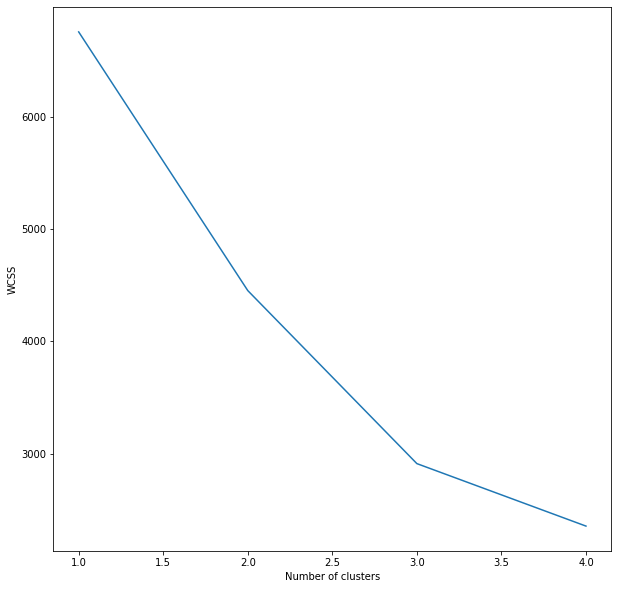

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
pca=PCA(2)
data = pca.fit_transform(document_embeddings_d2v)
wcss = []
for i in range(1,5):
   model = KMeans(n_clusters = i, init = "k-means++")
   #model.fit(document_embeddings_d2v)
   model.fit(data)
   wcss.append(model.inertia_)
plt.figure(figsize=(10,10))
plt.plot(range(1,5), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
pca = PCA(2)
data = pca.fit_transform(document_embeddings_d2v)

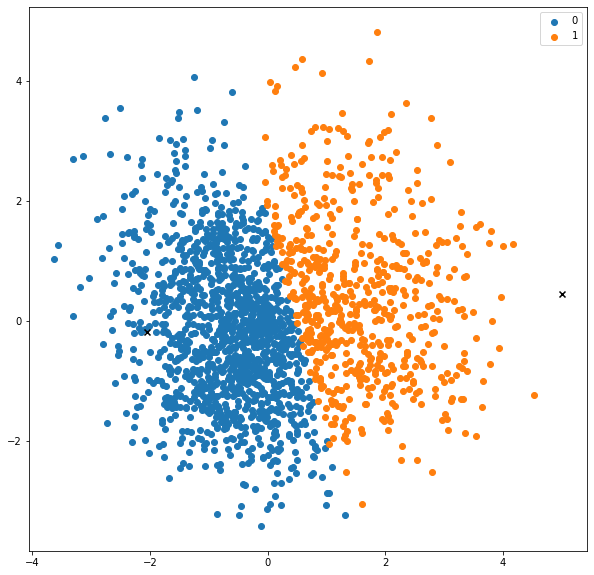

In [ ]:
centers = np.array(model.cluster_centers_)
model = KMeans(n_clusters = 2, init = "k-means++")
label = model.fit_predict(data)
#print(label)
plt.figure(figsize=(10,10))
uniq = np.unique(label)
for i in uniq:
   plt.scatter(data[label == i , 0] , data[label == i , 1] , label = i)
plt.scatter(centers[:,0], centers[:,1], marker="x", color='k')
#This is done to find the centroid for each clusters.
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
score = silhouette_score(data, label)
print("silhouette score is {})".format(round(score,2)))
print("DB Score: %0.3f"
      % davies_bouldin_score(data, label))

silhouette score is 0.36)
DB Score: 1.148


In [ ]:
cluster_df=pd.DataFrame(list(zip(tweet_list, label)),
              columns=['Tweet','Cluster'])
cluster_df.to_csv("tweet_cluster_d2v.csv")

In [ ]:
print(df)
df.reset_index(drop=True, inplace=True)

                                          Tweet_english
0     australia nears omicron peak as daily infectio...
1     indias covid vaccination coverage crosses  crore 
2      covid delhi records  cases  deaths testing low  
3     covid  west bengal registers  fresh cases amp ...
4     corona is a unique virus as it has a very high...
...                                                 ...
2007  worldbank suspends funding of projects in afgh...
2008  g leaders issued joint statement on afghanista...
2009  weve helped evacuate  people from afghanistan ...
2010  key face of antitaliban axis issues a warning ...
2011  newsalert  taliban panel meets chinese envoy t...

[2012 rows x 1 columns]


In [ ]:
df.iloc[350]

Tweet_english    Several videos on social media appear to show ...
Name: 350, dtype: object

In [ ]:
pip install -U sentence-transformers

     |████████████████████████████████| 78 kB 5.9 MB/s 
     |████████████████████████████████| 3.4 MB 51.6 MB/s 
     |████████████████████████████████| 6.8 MB 58.6 MB/s 
     |████████████████████████████████| 1.2 MB 46.0 MB/s 
     |████████████████████████████████| 67 kB 5.0 MB/s 
     |████████████████████████████████| 3.3 MB 40.4 MB/s 
     |████████████████████████████████| 895 kB 48.0 MB/s 
     |████████████████████████████████| 596 kB 58.5 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.1.0-py3-none-any.whl size=120999 sha256=f0f042ff8b346496693e27a2527f26375ad132e3feb3151983a0a5ea42430768
  Stored in directory: /root/.cache/pip/wheels/90/f0/bb/ed1add84da70092ea526466eadc2bfb197c4bcb8d4fa5f7bad
Successfully built sentence-transformers
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
from sentence_transformers import SentenceTransformer
#sbert_model = SentenceTransformer('bert-base-nli-mean-tokens')
#from sentence_transformers import SentenceTransformer
sbert_model = SentenceTransformer('all-MiniLM-L6-v2')
document_embeddings_bert = sbert_model.encode(df['Tweet_english'])
print(document_embeddings_bert.shape)


Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/612 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/350 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

(2012, 384)


In [ ]:

print(np.any(np.isnan(document_embeddings_bert)))
#document_embeddings_d2v = np.nan_to_num(document_embeddings_d2v)
#print(np.any(np.isnan(document_embeddings_d2v)))

False


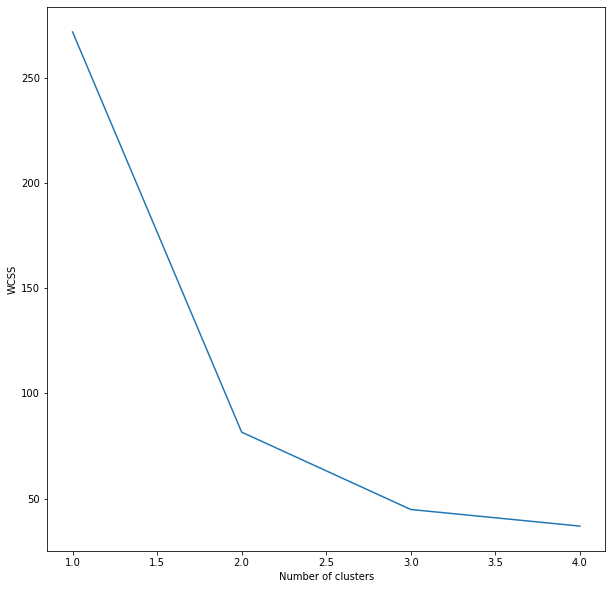

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
wcss = []
pca = PCA(2)
data = pca.fit_transform(document_embeddings_bert)
for i in range(1,5):
   model = KMeans(n_clusters = i, init = "k-means++")
   #model.fit(document_embeddings_bert)
   model.fit(data)
   wcss.append(model.inertia_)
plt.figure(figsize=(10,10))
plt.plot(range(1,5), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
pca = PCA(2)
data = pca.fit_transform(document_embeddings_bert)

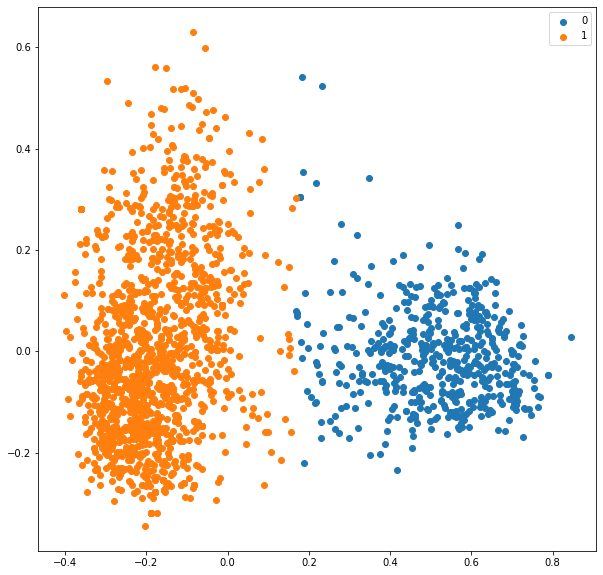

In [ ]:
import numpy as np
#centers = np.array(model.cluster_centers_)
model = KMeans(n_clusters = 2, init = "k-means++")
label = model.fit_predict(data)
#print(label)
plt.figure(figsize=(10,10))
uniq = np.unique(label)
for i in uniq:
   plt.scatter(data[label == i , 0] , data[label == i , 1] , label = i)
#plt.scatter(centers[:,0], centers[:,1], marker="x", color='k')
#This is done to find the centroid for each clusters.
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
score = silhouette_score(data, label)
print("silhouette score is {})".format(round(score,2)))
print("DB Score: %0.3f"
      % davies_bouldin_score(data, label))

silhouette score is 0.6499999761581421)
DB Score: 0.480


In [ ]:
cluster_df=pd.DataFrame(list(zip(tweet_list, label)),
              columns=['Tweet','Cluster'])
cluster_df.to_csv("tweet_cluster_BERT.csv")